## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [60]:
import pandas as pd
import numpy as np
from sklearn import model_selection

In [61]:
stud_df=pd.read_csv(r"C:\Users\sarangk\Downloads\Kavyal\REsidency 3 ClassData\external lab\student.txt",delimiter=";")

In [62]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [63]:
stud_df.index.name="number"
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [64]:
stud_df.select_dtypes(exclude=[np.number])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [65]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [66]:
stud_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

Not dropping columns as the columns which have variance less than zero are categorical data which have been encoded

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [67]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

stud_df['school'] = num.fit_transform(stud_df['school'].astype("str"))
stud_df['sex'] = num.fit_transform(stud_df['sex'].astype("str"))
stud_df['address'] = num.fit_transform(stud_df['address'].astype("str"))
stud_df['famsize'] = num.fit_transform(stud_df['famsize'].astype("str"))
stud_df['Pstatus'] = num.fit_transform(stud_df['Pstatus'].astype("str"))
stud_df['Mjob'] = num.fit_transform(stud_df['Mjob'].astype("str"))
stud_df['Fjob'] = num.fit_transform(stud_df['Fjob'].astype("str"))
stud_df['reason'] = num.fit_transform(stud_df['reason'].astype("str"))
stud_df['guardian'] = num.fit_transform(stud_df['guardian'].astype("str"))
stud_df['schoolsup'] = num.fit_transform(stud_df['schoolsup'].astype("str"))
stud_df['famsup'] = num.fit_transform(stud_df['famsup'].astype("str"))
stud_df['paid'] = num.fit_transform(stud_df['paid'].astype("str"))
stud_df['activities'] = num.fit_transform(stud_df['activities'].astype("str"))
stud_df['nursery'] = num.fit_transform(stud_df['nursery'].astype("str"))
stud_df['higher'] = num.fit_transform(stud_df['higher'].astype("str"))
stud_df['internet'] = num.fit_transform(stud_df['internet'].astype("str"))
stud_df['romantic'] = num.fit_transform(stud_df['romantic'].astype("str"))

In [68]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [69]:
stud_df['G1'] = np.where(stud_df['G1']>=10, 1, 0)
stud_df['G2'] = np.where(stud_df['G2']>=10, 1, 0)
stud_df['G3'] = np.where(stud_df['G3']>=10, 1, 0)
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [70]:
X = stud_df.drop(columns='G3')
y= stud_df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

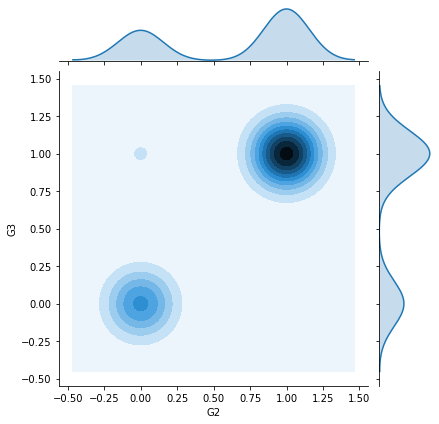

In [71]:
import seaborn as sns
sns.jointplot("G2", "G3", data=stud_df, kind='kde')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

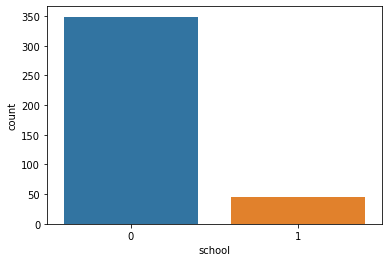

In [72]:
#Number of students in each school
#Count Plot
#st_df["school"].groupby(st_df["school"]).count()
sns.countplot(x='school', data=stud_df)


In [73]:
#In the above graph, 0 - GP school and 1- HP school.
#This dataset contains more students of GP school and less students of HP school.

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

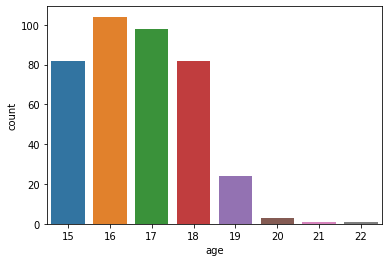

In [74]:
#Number of Students with different ages
sns.countplot(x='age', data=stud_df)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [75]:
#Import necessary files 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=95, random_state=0)

In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\sarangk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)
print("Training Accuracy : ", train_accuracy)
print("Test Accuracy : ", test_accuracy)

Training Accuracy :  0.9233333333333333
Test Accuracy :  0.9263157894736842


In [81]:
train_f1score = f1_score(y_train_pred, y_train)
test_f1score = f1_score(y_test_pred, y_test)
print("Training f1 score : ", train_f1score)
print("Test f1 score : ", test_f1score)

Training f1 score :  0.9434889434889434
Test f1 score :  0.94017094017094


# Naive bayes with Iris data

### Import Iris.csv

In [82]:
iris = pd.read_csv(r"C:\Users\sarangk\Downloads\Kavyal\REsidency 3 ClassData\external lab\iris.csv")

In [83]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [84]:
iris[iris.isna().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [85]:
iris["SepalLengthCm"]= iris["SepalLengthCm"].replace(np.nan,iris["SepalLengthCm"].median())
iris["SepalWidthCm"]= iris["SepalWidthCm"].replace(np.nan,iris["SepalWidthCm"].median())
iris["PetalLengthCm"]= iris["PetalLengthCm"].replace(np.nan,iris["PetalLengthCm"].median())
iris["PetalWidthCm"]= iris["PetalWidthCm"].replace(np.nan,iris["PetalWidthCm"].median())

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [86]:
X = iris.drop("Species", axis=1)
y = iris["Species"]

### Find the distribution of target variable (Class)

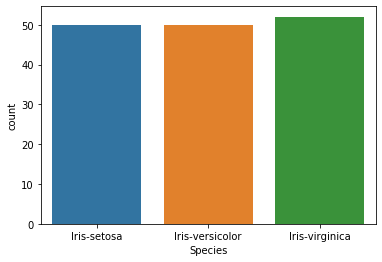

In [87]:
sns.countplot(x='Species', data=iris)

### Plot the distribution of target variable using histogram

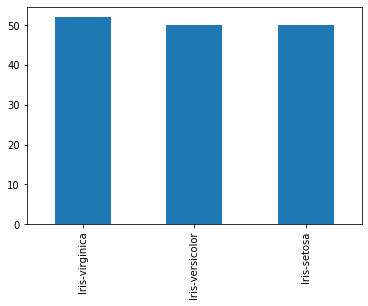

In [88]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

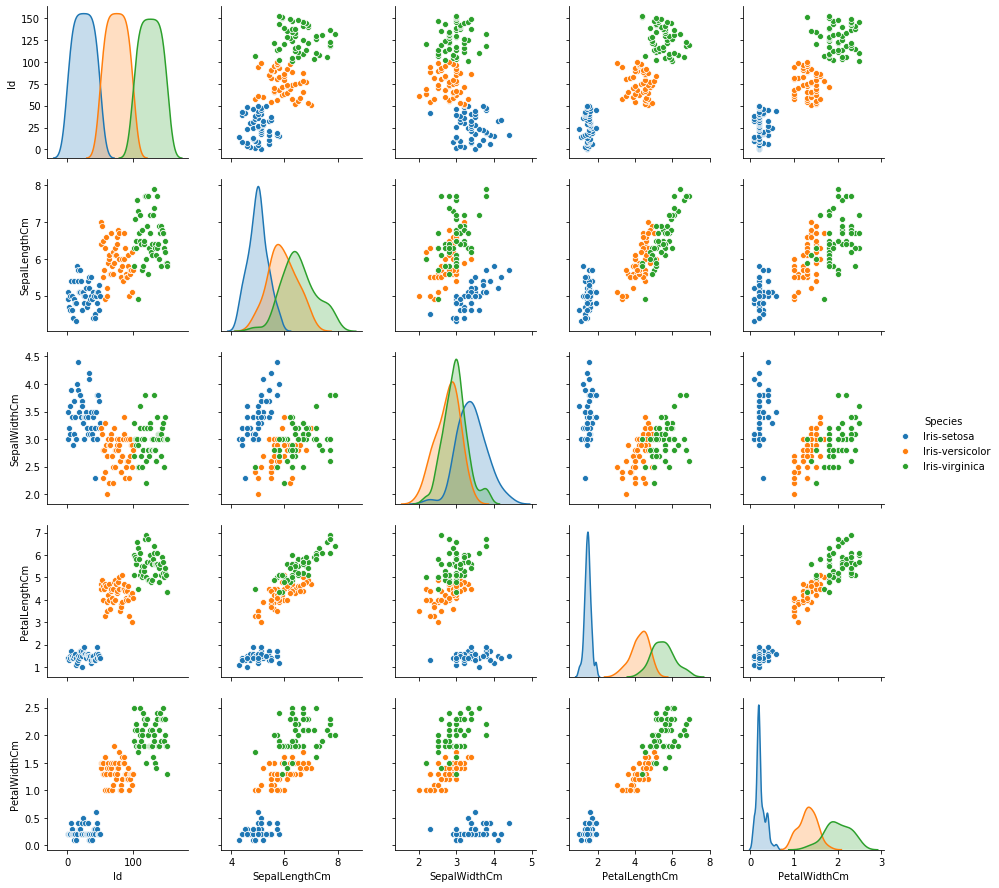

In [89]:
#We can use scatter matrix or pairplot(a type of scatter matrix) to show the distribution of variables.
#Here, we use Pairplot as it had the facility to add "Hue" feature to show better co-relation between variables.

#pd.plotting.scatter_matrix(iris,figsize=(10,10));
sns.pairplot(iris, hue="Species")

### Summary Statistics and explain insights for at least 2 variables

In [90]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
#Insights :
#- Sepal Width is looks somewhat normally distribued as there is not much difference between mean and median.
#It also has the least Std deviation compared to others meaning - the spread is not much.

#- We can see more spread of values in Petal Length as Min is 1 and Max is 6.9. It also has the hightest Std deviation - 1.754


### Correlation among all variables and give your insights

In [92]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.702734,-0.392693,0.872346,0.890676
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000


In [ ]:
#Insights:
# - Petal Length , Petal Width, Sepal Length have great co-relation with Petal Length and Petal Width co-relation being the highest.
# - We do not see any co-relation between Sepal Width and other variables.


### Split data in Training and Validation in 80:20

In [93]:
#Training dataset - X_train, y_train
#Validation dataset - X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state = 4)

### Do Feature Scaling

In [94]:
#Here, we are using the Standard Scaler
std = StandardScaler()
std.fit(X_train)
scaledX_train = std.transform(X_train)
scaledX_test = std.transform(X_test)

### Train and Fit NaiveBayes Model

In [95]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)


GaussianNB(priors=None, var_smoothing=1e-09)


In [96]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [97]:
#Accuracy
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)
print("Training Accuracy : ", train_accuracy)
print("Test Accuracy : ", test_accuracy)

Training Accuracy :  1.0
Test Accuracy :  0.967741935483871


In [98]:
#Confusion Matrix
print(confusion_matrix(y_test_pred, y_test))

[[16  0  0]
 [ 0  8  1]
 [ 0  0  6]]


In [0]:
usion : We are getting the above results as the classification of data is very good(which we also saw in pairplot
#and co-relation matrix)